## Dementia vs Controls Mainconcept Analysis

In [31]:
import pandas as pd
import numpy as np

controls_features_df = pd.read_csv('../../data/classification/dementia_controls_mainconcept_features_qsub.csv')   # Replace with the actual filename
print(controls_features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   participant                             113 non-null    object 
 1   total_utterances                        113 non-null    int64  
 2   distance_to_centroid                    113 non-null    float64
 3   num_unique_main_concepts                113 non-null    int64  
 4   num_total_main_concepts                 113 non-null    int64  
 5   unique_main_concept_match_ratio         113 non-null    float64
 6   total_main_concept_match_ratio          113 non-null    float64
 7   sequence_score_mainconcept              113 non-null    float64
 8   local_coherence_mainconcept             113 non-null    float64
 9   global_coherence_mainconcept            113 non-null    float64
 10  num_topic_switching                     113 non-null    int64 

In [32]:
participants_df = pd.read_csv('../../data/classification/combined_patient_data_111725.csv')  
print(participants_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Corpus             309 non-null    object 
 1   participant        309 non-null    object 
 2   age                302 non-null    object 
 3   sex                309 non-null    object 
 4   diagnosis          309 non-null    object 
 5   WAB score          102 non-null    float64
 6   standardized MOCA  132 non-null    float64
 7   gen_diagnosis      309 non-null    object 
dtypes: float64(2), object(6)
memory usage: 19.4+ KB
None


In [33]:
# Conditionally create combined ID only if Participant_Code starts with a numerical value (digit)
participants_df['combined_id'] = np.where(
    participants_df['participant'].str[0].str.isdigit(),
    participants_df['Corpus'].str.lower().str.strip() + participants_df['participant'].str.strip(),
    participants_df['participant'].str.strip()  # Fallback to just participant code if condition not met
)

participants_df['combined_id'] = participants_df['combined_id'].str.lower()

# Output the combined IDs
print(participants_df['combined_id'].tolist())

['delaware02-1', 'delaware03-1', 'delaware04-1', 'delaware05-1', 'delaware07-1', 'delaware08-1', 'delaware101-1', 'delaware12-1', 'delaware13-1', 'delaware200-1', 'delaware201-1', 'delaware203-1', 'delaware204-1', 'delaware208-1', 'delaware209-1', 'delaware214-1', 'delaware218-1', 'delaware220-1', 'delaware221-1', 'delaware224-1', 'delaware225-1', 'delaware226-1', 'delaware227-1', 'delaware228-1', 'delaware229-1', 'delaware233-1', 'delaware234-1', 'delaware235-1', 'delaware24-1', 'delaware244-1', 'delaware25-1', 'delaware270-1', 'delaware271-1', 'delaware276-1', 'delaware278-1', 'delaware279-1', 'delaware29-1', 'delaware30-1', 'delaware35-1', 'delaware36-1', 'delaware37-1', 'delaware38-1', 'delaware39-1', 'delaware42-1', 'delaware44-1', 'delaware45-1', 'delaware46-1', 'delaware48-1', 'delaware60-1', 'delaware62-1', 'delaware65-1', 'delaware67-1', 'delaware70-1', 'delaware77-1', 'delaware81-1', 'delaware84-1', 'delaware86-1', 'delaware87-1', 'delaware90-1', 'delaware92-1', 'delaware93-1

In [34]:
controls_df = participants_df[participants_df['gen_diagnosis'] == 'Control']
dementia_df = participants_df[participants_df['gen_diagnosis'] == 'Dementia']
print(dementia_df['combined_id'].tolist())
# print(len(controls_df))
# print(controls_df.info())

['delaware01-1', 'delaware06-1', 'delaware09-1', 'delaware10-1', 'delaware11-1', 'delaware14-1', 'delaware15-1', 'delaware16-1', 'delaware17-1', 'delaware18-1', 'delaware19-1', 'delaware20-1', 'delaware207-1', 'delaware21-1', 'delaware216-1', 'delaware22-1', 'delaware23-1', 'delaware232-1', 'delaware26-1', 'delaware27-1', 'delaware277-1', 'delaware28-1', 'delaware31-1', 'delaware32-1', 'delaware33-1', 'delaware34-1', 'delaware40-1', 'delaware43-1', 'delaware47-1', 'delaware49-1', 'delaware50-1', 'delaware52-1', 'delaware53-1', 'delaware54-1', 'delaware55-1', 'delaware57-1', 'delaware58-1', 'delaware59-1', 'delaware61-1', 'delaware63-1', 'delaware64-1', 'delaware66-1', 'delaware68-1', 'delaware69-1', 'delaware71-1', 'delaware74-1', 'delaware75-1', 'delaware78-1', 'delaware79-1', 'delaware88-1', 'delaware91-1', 'delaware95-1', 'baycrest10285', 'baycrest11634', 'baycrest11976', 'baycrest12257', 'baycrest12756', 'baycrest12813', 'baycrest12814', 'baycrest12828', 'baycrest12829', 'baycrest1

### Check if any participants is missing in Controls and Dementia from features and participants data

In [35]:
# unique IDs from each side
p_ids = set(controls_df['combined_id'])
f_ids = set(controls_features_df['participant'])
print(len(p_ids)), 
print(len(f_ids))

# who is in participants_df but NOT in controls_features_df
missing_in_features = p_ids - f_ids

# who is in controls_features_df but NOT in participants_df
missing_in_participants = f_ids - p_ids

print("Missing in controls_features_df:", missing_in_features)
print("Missing in participants_df:", missing_in_participants)

113
113
Missing in controls_features_df: set()
Missing in participants_df: set()


In [37]:
dementia_features_df = pd.read_csv('../../data/classification/dementia_mainconcept_features_qsub.csv')  
dementia_features_df['participant'] = dementia_features_df['participant'].str.lower()# Conditionally create combined ID only if Participant_Code starts with a numerical value (digit)
dementia_features_df['participant'] = np.where(
    dementia_features_df['participant'].str[0].str.isdigit(),
    "delaware"+ dementia_features_df['participant'].str.strip(),
    dementia_features_df['participant'].str.strip()  # Fallback to just participant code if condition not met
)

print(dementia_features_df['participant'].tolist())

['baycrest11634', 'delaware22-1', 'rbn7927a', 'delaware75-1', 'delaware64-1', 'baycrest12828', 'delaware75-2', 'jre5043a', 'baycrest2103', 'delaware32-1', 'delaware53-2', 'delaware23-1', 'delaware232-1', 'due3951a', 'delaware18-1', 'baycrest8538', 'baycrest12756', 'bdy3628a', 'baycrest12814', 'kcr7045a', 'delaware19-1', 'delaware22-1', 'delaware277-1', 'delaware47-1', 'delaware50-1', 'delaware15-2', 'delaware14-1', 'delaware216-1', 'bmn3031b', 'bbw8512a', 'delaware52-1', 'lby4645a', 'delaware58-1', 'dcr7644a', 'delaware59-1', 'baycrest11976', 'delaware88-1', 'mvs4058a', 'rcl5752', 'delaware57-2', 'delaware01-1', 'delaware64-2', 'delaware09-1', 'delaware10-1', 'delaware17-1', 'emh9057a', 'amr6628a', 'jks7696a', 'delaware11-1', 'tbd4254a', 'delaware31-1', 'delaware95-1', 'hwn0674a', 'delaware54-1', 'delaware61-1', 'delaware63-1', 'baycrest13196', 'jbh5314a', 'delaware79-1', 'delaware68-1', 'lrw4117a', 'delaware43-1', 'baycrest12257', 'delaware16-1', 'delaware21-1', 'delaware34-1', 'chp47

In [ ]:
# unique IDs from each side
p_ids = set(dementia_df['combined_id'])
f_ids = set(dementia_features_df['participant'])

# who is in participants_df but NOT in controls_features_df
missing_in_features = p_ids - f_ids

# who is in controls_features_df but NOT in participants_df
missing_in_participants = f_ids - p_ids

print("Missing in dementia_features_df:", missing_in_features)
print("Missing in participants_df:", missing_in_participants)

Missing in aphasia_features_df: set()
Missing in participants_df: {'delaware57-2', 'delaware95-2', 'delaware64-2', 'delaware14-2', 'delaware20-2', 'delaware15-2', 'bme3172a', 'delaware22-2', 'delaware53-2', 'delaware75-2', 'baycrest13196'}


### Merge and concatenate Dataframe Controls and Aphasia

In [39]:
controls_df['participant'] = controls_df['combined_id']
controls_df = controls_df.drop(columns=['combined_id'])

controls_combined_df = pd.merge(controls_df, controls_features_df, on='participant', how='inner')
controls_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Corpus                                  113 non-null    object 
 1   participant                             113 non-null    object 
 2   age                                     113 non-null    object 
 3   sex                                     113 non-null    object 
 4   diagnosis                               113 non-null    object 
 5   WAB score                               0 non-null      float64
 6   standardized MOCA                       66 non-null     float64
 7   gen_diagnosis                           113 non-null    object 
 8   total_utterances                        113 non-null    int64  
 9   distance_to_centroid                    113 non-null    float64
 10  num_unique_main_concepts                113 non-null    int64 

/scratch/ipykernel_1444288/245591086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controls_df['participant'] = controls_df['combined_id']


In [40]:
dementia_df['participant'] = dementia_df['combined_id']
dementia_df = dementia_df.drop(columns=['combined_id'])

dementia_combined_df = pd.merge(dementia_df, dementia_features_df, on='participant', how='inner')
print(len(dementia_df))
print(len(dementia_features_df))
dementia_combined_df.info()

94
106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Corpus                                  95 non-null     object 
 1   participant                             95 non-null     object 
 2   age                                     88 non-null     object 
 3   sex                                     95 non-null     object 
 4   diagnosis                               95 non-null     object 
 5   WAB score                               0 non-null      float64
 6   standardized MOCA                       67 non-null     float64
 7   gen_diagnosis                           95 non-null     object 
 8   total_utterances                        95 non-null     int64  
 9   distance_to_centroid                    95 non-null     float64
 10  num_unique_main_concepts                95 non-null     i

/scratch/ipykernel_1444288/700747091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia_df['participant'] = dementia_df['combined_id']


## Concetenate the patients and controls data

In [42]:
all_df = pd.concat([dementia_combined_df, controls_combined_df], ignore_index=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Corpus                                  208 non-null    object 
 1   participant                             208 non-null    object 
 2   age                                     201 non-null    object 
 3   sex                                     208 non-null    object 
 4   diagnosis                               208 non-null    object 
 5   WAB score                               0 non-null      float64
 6   standardized MOCA                       133 non-null    float64
 7   gen_diagnosis                           208 non-null    object 
 8   total_utterances                        208 non-null    int64  
 9   distance_to_centroid                    208 non-null    float64
 10  num_unique_main_concepts                208 non-null    int64 

In [43]:
columns_to_drop = ['sex','Corpus','WAB score', 'diagnosis', 'age', 'standardized MOCA', ]
num_df = all_df.drop(columns=columns_to_drop)
num_cols = num_df.columns
print(num_cols)

Index(['participant', 'gen_diagnosis', 'total_utterances',
       'distance_to_centroid', 'num_unique_main_concepts',
       'num_total_main_concepts', 'unique_main_concept_match_ratio',
       'total_main_concept_match_ratio', 'sequence_score_mainconcept',
       'local_coherence_mainconcept', 'global_coherence_mainconcept',
       'num_topic_switching', 'ratio_topic_switching_percent',
       'num_missing_referent', 'ratio_missing_referent_percent',
       'num_tangential_utterance', 'ratio_tangential_utterance_percent',
       'num_propositional_repetition',
       'ratio_propositional_repetition_percent', 'num_filler',
       'ratio_filler_percent', 'num_conceptual_incongruence',
       'ratio_conceptual_incongruence_percent', 'num_coherent',
       'ratio_coherent_percent'],
      dtype='object')


In [44]:
patients_df = num_df[num_df['gen_diagnosis'] == 'Dementia']
controls_df = num_df[num_df['gen_diagnosis'] == 'Control']

print(f"Number of patients: {len(patients_df)}")
print(f"Number of controls: {len(controls_df)}")

Number of patients: 95
Number of controls: 113


### Density Plot after z-score normalization

In [45]:
import numpy as np
import pandas as pd

# columns to scale: all numeric except the label column(s)
num_cols = num_df.select_dtypes(include='number').columns.tolist()
for c in ['group']:
    if c in num_cols:
        num_cols.remove(c)

# fit params on the whole df
means = num_df[num_cols].mean()
stds  = num_df[num_cols].std(ddof=0).replace(0, np.nan)  # avoid div-by-zero

# normalized copy
df_z = all_df.copy()
df_z[num_cols] = (num_df[num_cols] - means) / stds

# if you prefer to keep zero-variance columns as 0 instead of NaN:
df_z[num_cols] = df_z[num_cols].fillna(0)

# split back to groups (normalized)
patients_df_z = df_z[df_z['gen_diagnosis'] == 'Dementia'].copy()
controls_df_z = df_z[df_z['gen_diagnosis'] == 'Control'].copy()


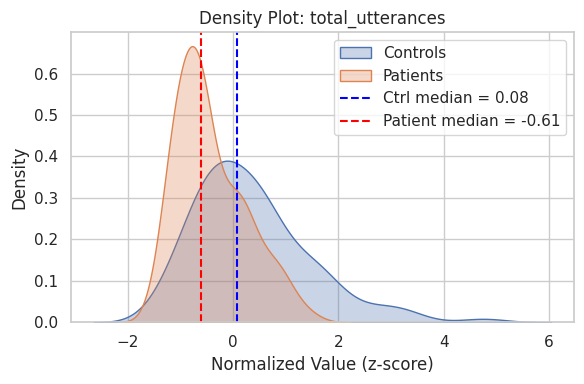

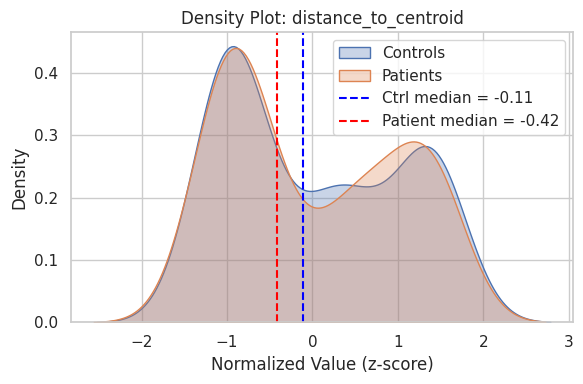

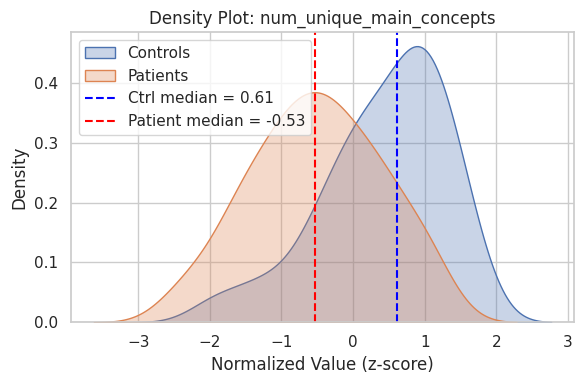

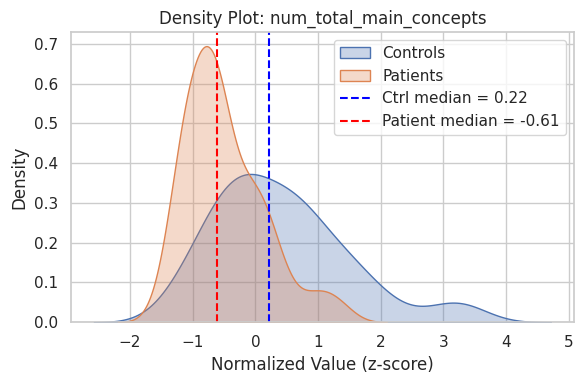

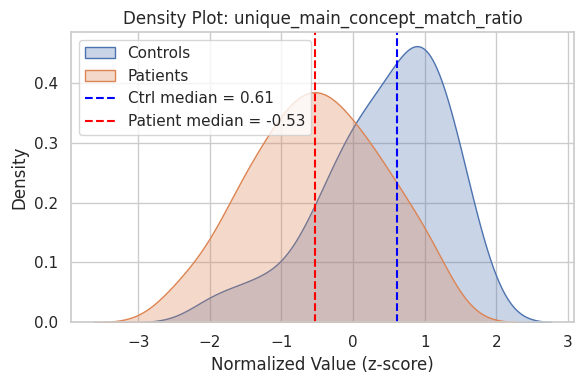

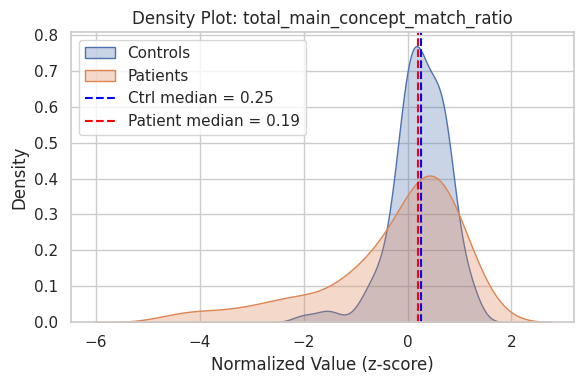

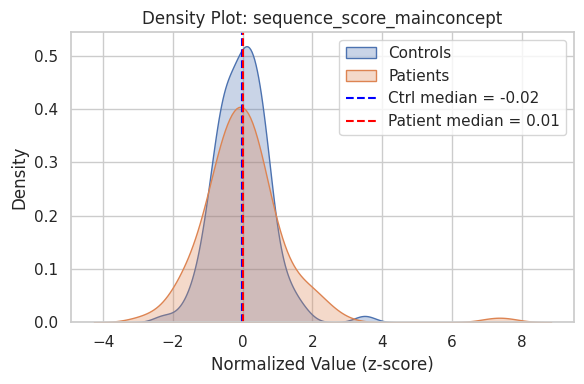

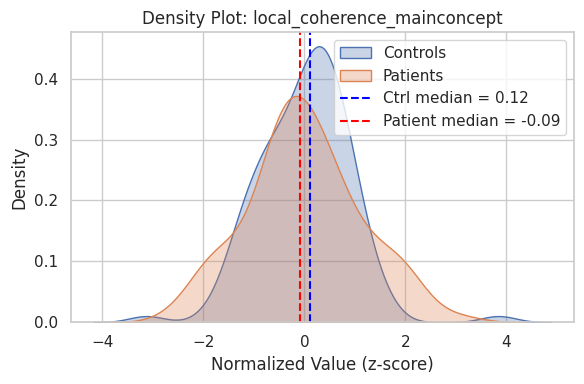

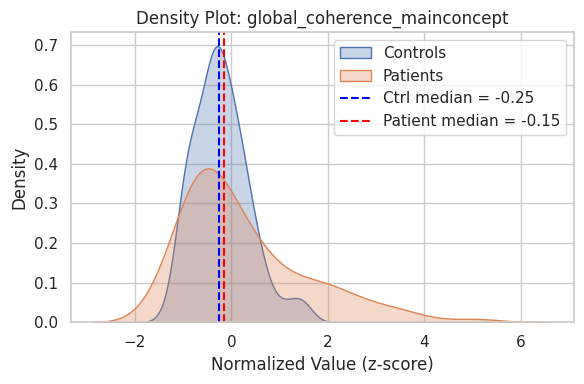

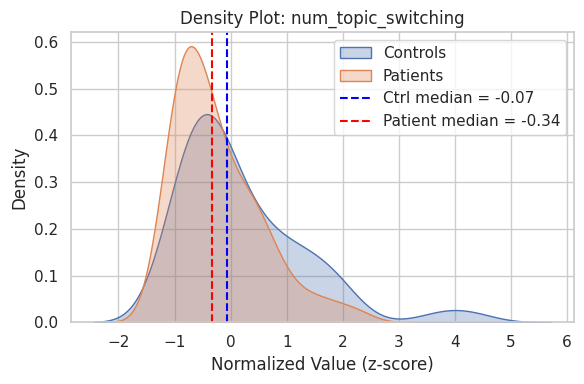

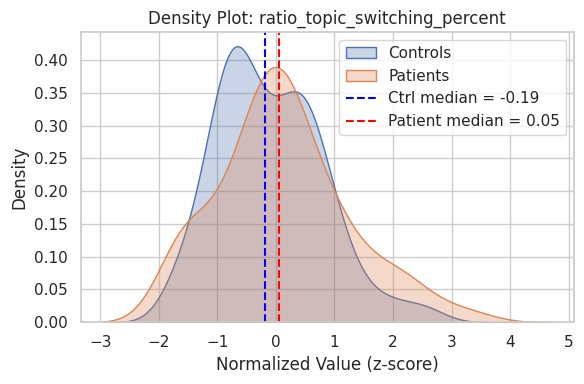

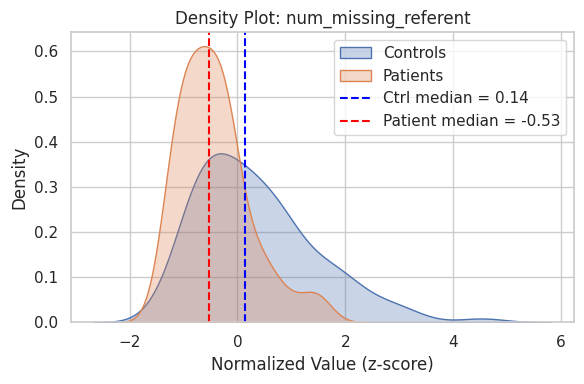

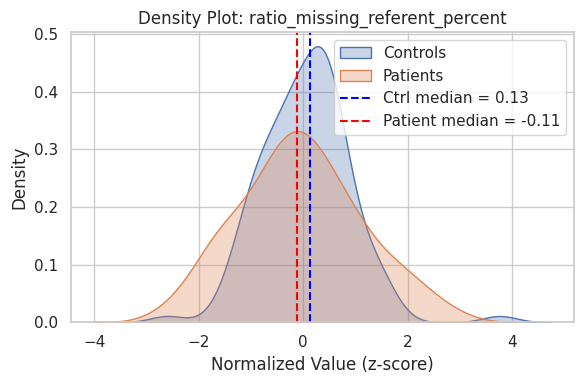

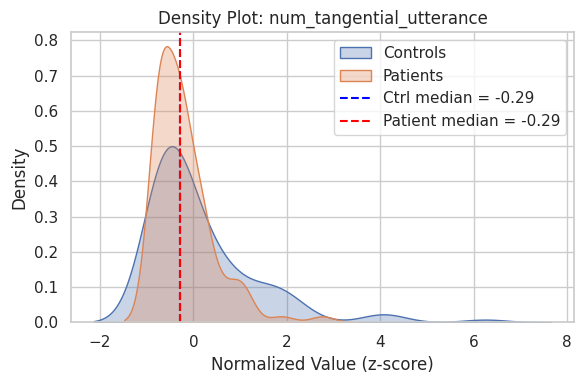

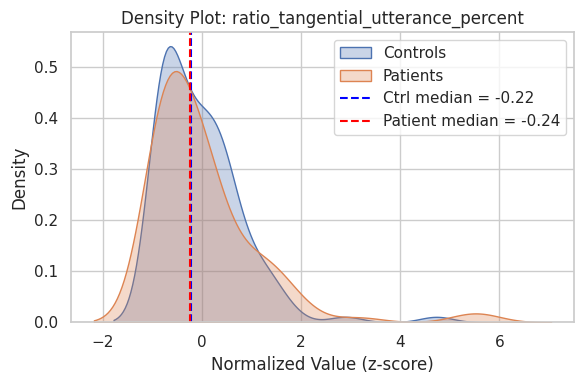

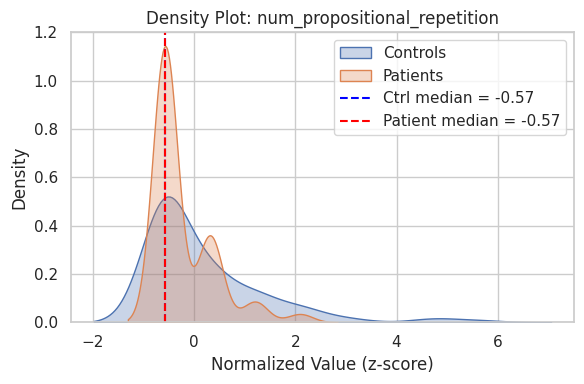

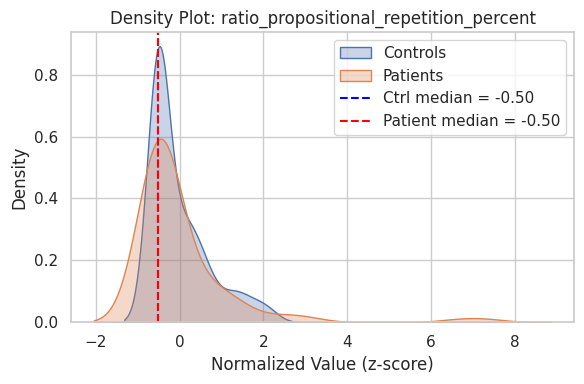

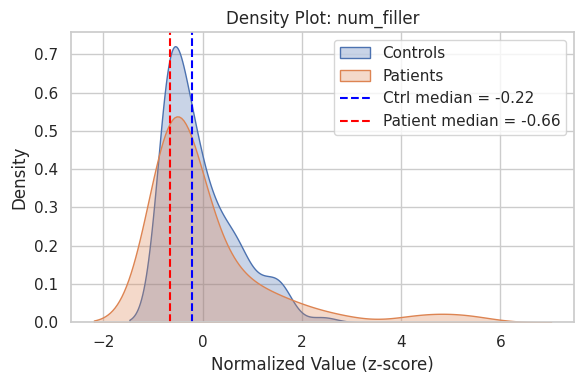

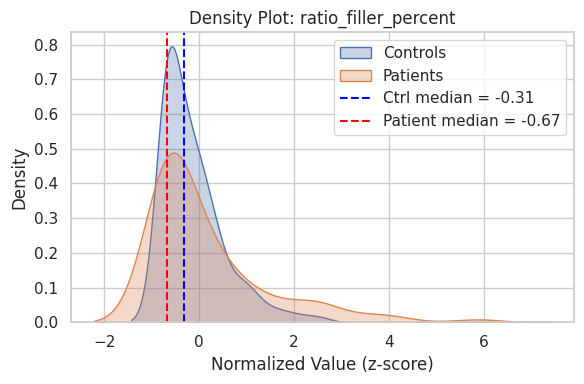

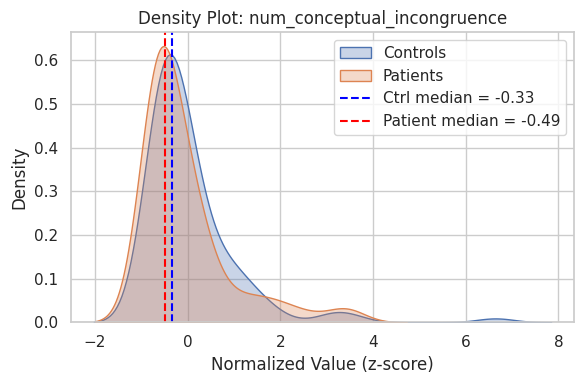

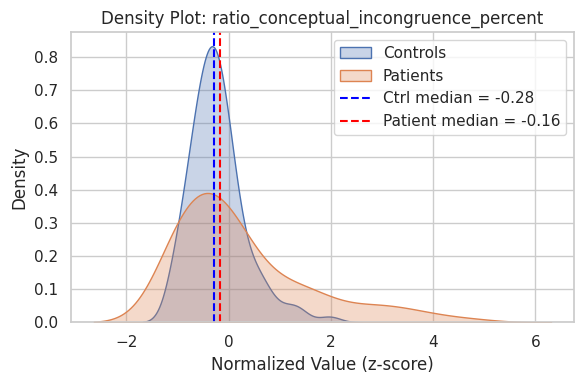

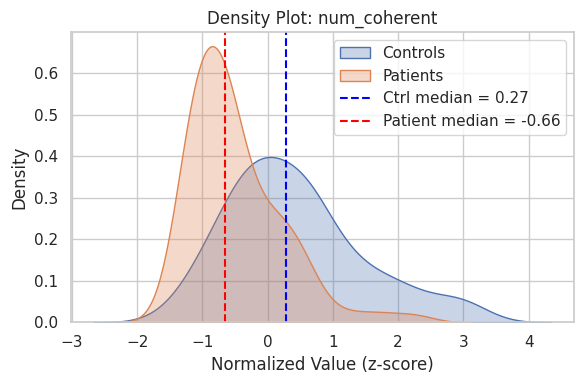

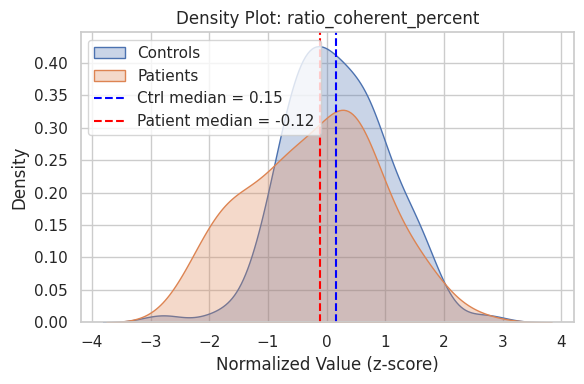

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set(style="whitegrid")

for col in num_cols:
    plt.figure(figsize=(6, 4))

    # Plot KDE for each group
    sns.kdeplot(data=controls_df_z, x=col, fill=True, alpha=0.3, label='Controls')
    sns.kdeplot(data=patients_df_z, x=col, fill=True, alpha=0.3, label='Patients')

    # Compute and plot group means
    median_ctrl = controls_df_z[col].median()
    median_pat  = patients_df_z[col].median()

    plt.axvline(median_ctrl, color='blue', linestyle='--', linewidth=1.5, label=f'Ctrl median = {median_ctrl:.2f}')
    plt.axvline(median_pat, color='red', linestyle='--', linewidth=1.5, label=f'Patient median = {median_pat:.2f}')

    plt.title(f'Density Plot: {col}')
    plt.xlabel('Normalized Value (z-score)')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

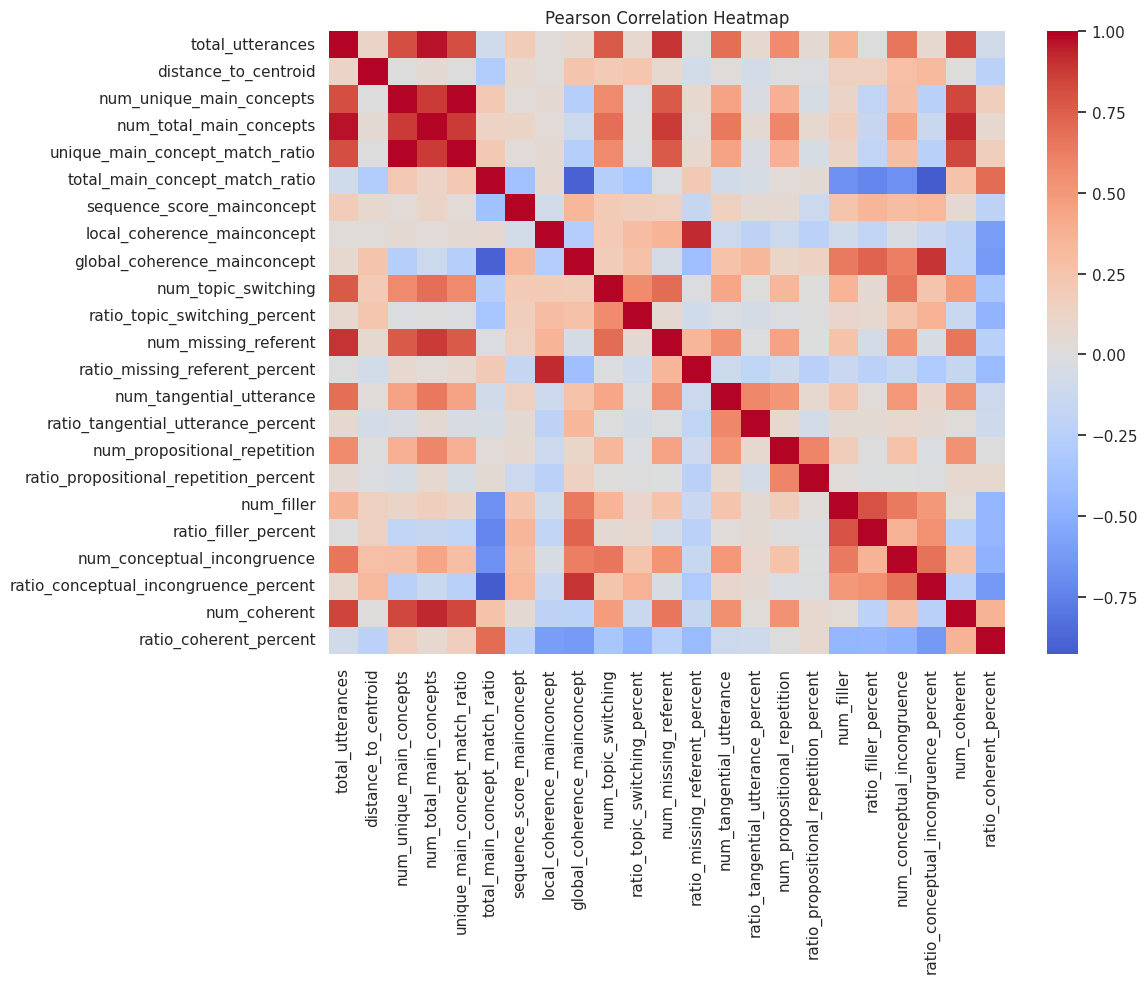

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Pearson correlation
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.show()

In [49]:
import numpy as np

# Take absolute values
corr_abs = corr.abs()

# Mask the diagonal (self correlations)
np.fill_diagonal(corr_abs.values, 0)

# Find pairs above threshold
high_corr_pairs = np.where(corr_abs > 0.8)

pairs = []
for i, j in zip(*high_corr_pairs):
    if i < j:  # avoid duplicates
        pairs.append((
            corr.index[i],
            corr.columns[j],
            corr.iloc[i, j]   # original (signed) correlation value
        ))

for a, b, r in pairs:
    print(f"{a}  <-->  {b}   r = {r:.3f}")

total_utterances  <-->  num_unique_main_concepts   r = 0.819
total_utterances  <-->  num_total_main_concepts   r = 0.964
total_utterances  <-->  unique_main_concept_match_ratio   r = 0.819
total_utterances  <-->  num_missing_referent   r = 0.898
total_utterances  <-->  num_coherent   r = 0.848
num_unique_main_concepts  <-->  num_total_main_concepts   r = 0.873
num_unique_main_concepts  <-->  unique_main_concept_match_ratio   r = 1.000
num_unique_main_concepts  <-->  num_coherent   r = 0.842
num_total_main_concepts  <-->  unique_main_concept_match_ratio   r = 0.873
num_total_main_concepts  <-->  num_missing_referent   r = 0.877
num_total_main_concepts  <-->  num_coherent   r = 0.926
unique_main_concept_match_ratio  <-->  num_coherent   r = 0.842
total_main_concept_match_ratio  <-->  global_coherence_mainconcept   r = -0.898
total_main_concept_match_ratio  <-->  ratio_conceptual_incongruence_percent   r = -0.927
local_coherence_mainconcept  <-->  ratio_missing_referent_percent   r = 0.92

In [51]:
cols_to_remove = []
cols_to_remove.extend([
    "total_utterances",
    "num_unique_main_concepts",
    "num_total_main_concepts",
    "local_coherence_mainconcept",
    "global_coherence_mainconcept",
    "num_coherent",
    "ratio_conceptual_incongruence_percent"
    
])

df_clean = num_df.drop(columns=cols_to_remove, errors="ignore")
feature_cols = df_clean.columns

corr = df_clean.corr(numeric_only=True)

In [52]:
import numpy as np

# Take absolute values
corr_abs = corr.abs()

# Mask the diagonal (self correlations)
np.fill_diagonal(corr_abs.values, 0)

# Find pairs above threshold
high_corr_pairs = np.where(corr_abs > 0.8)

pairs = []
for i, j in zip(*high_corr_pairs):
    if i < j:  # avoid duplicates
        pairs.append((
            corr.index[i],
            corr.columns[j],
            corr.iloc[i, j]   # original (signed) correlation value
        ))

for a, b, r in pairs:
    print(f"{a}  <-->  {b}   r = {r:.3f}")

### Logistic Regression Classification

In [54]:
df_ml = df_z.drop(columns=cols_to_remove + columns_to_drop, errors='ignore').copy()
df_ml = df_ml[df_ml['gen_diagnosis'].isin(['Dementia', 'Control'])].copy()
df_ml['label'] = (df_ml['gen_diagnosis'] == 'Dementia').astype(int)
df_ml = df_ml.drop(columns=['gen_diagnosis'], errors='ignore')
participants = df_ml['participant']
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   participant                             208 non-null    object 
 1   distance_to_centroid                    208 non-null    float64
 2   unique_main_concept_match_ratio         208 non-null    float64
 3   total_main_concept_match_ratio          208 non-null    float64
 4   sequence_score_mainconcept              208 non-null    float64
 5   num_topic_switching                     208 non-null    float64
 6   ratio_topic_switching_percent           208 non-null    float64
 7   num_missing_referent                    208 non-null    float64
 8   ratio_missing_referent_percent          208 non-null    float64
 9   num_tangential_utterance                208 non-null    float64
 10  ratio_tangential_utterance_percent      208 non-null    float6

In [55]:
y = df_ml['label']

X = df_ml.drop(
    columns=[
        'label',
        'participant',      # or 'combined_id' depending on what you kept
    ],
    errors='ignore'
)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    solver='liblinear',
    max_iter=500,
    class_weight='balanced'  # good for class imbalance
)

logreg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [57]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.75      0.79      0.77        19

    accuracy                           0.79        42
   macro avg       0.78      0.79      0.78        42
weighted avg       0.79      0.79      0.79        42



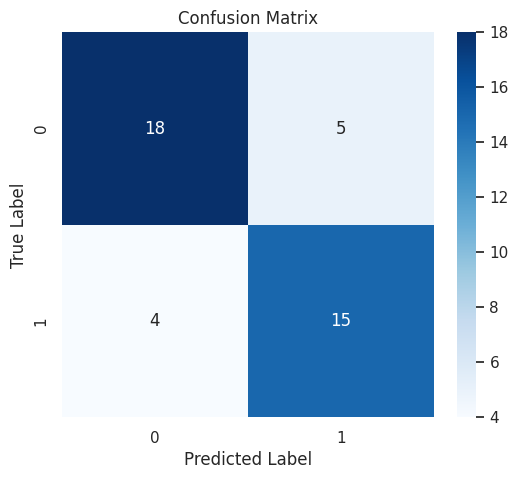

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Boolean masks for errors
false_neg_mask = (y_test == 1) & (y_pred == 0)
false_pos_mask = (y_test == 0) & (y_pred == 1)

# Get participant codes by aligning indices to the original df
false_negative_participants = df_ml.loc[X_test.index[false_neg_mask], 'participant'].tolist()
false_positive_participants = df_ml.loc[X_test.index[false_pos_mask], 'participant'].tolist()

print("False Negatives:", false_negative_participants)
print("False Positives:", false_positive_participants)

False Negatives: ['delaware11-1', 'delaware57-1', 'delaware74-1', 'delaware68-1']
False Positives: ['delaware03-1', 'capilouto13a', 'delaware30-1', 'neural4-1', 'delaware04-1']


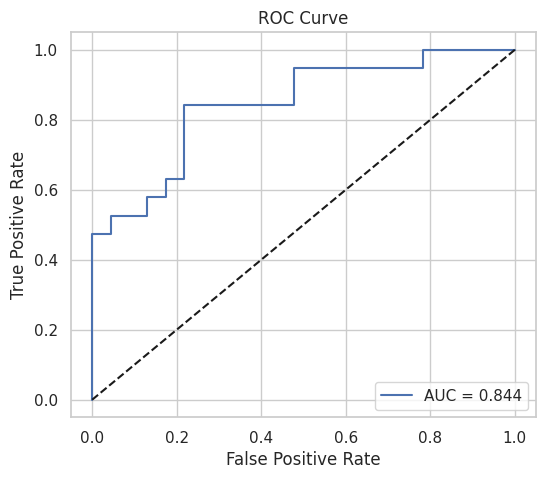

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.3f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [61]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": logreg.coef_[0]
}).sort_values("coefficient", ascending=False)

print(coef_df)

                                   feature  coefficient
12                              num_filler     0.632590
11  ratio_propositional_repetition_percent     0.532757
8                 num_tangential_utterance     0.241043
7           ratio_missing_referent_percent     0.157187
3               sequence_score_mainconcept     0.126812
5            ratio_topic_switching_percent     0.061553
4                      num_topic_switching    -0.023701
0                     distance_to_centroid    -0.099668
9       ratio_tangential_utterance_percent    -0.122367
15                  ratio_coherent_percent    -0.130178
10            num_propositional_repetition    -0.423663
1          unique_main_concept_match_ratio    -0.425284
14             num_conceptual_incongruence    -0.426037
13                    ratio_filler_percent    -0.794162
6                     num_missing_referent    -0.822742
2           total_main_concept_match_ratio    -0.939756


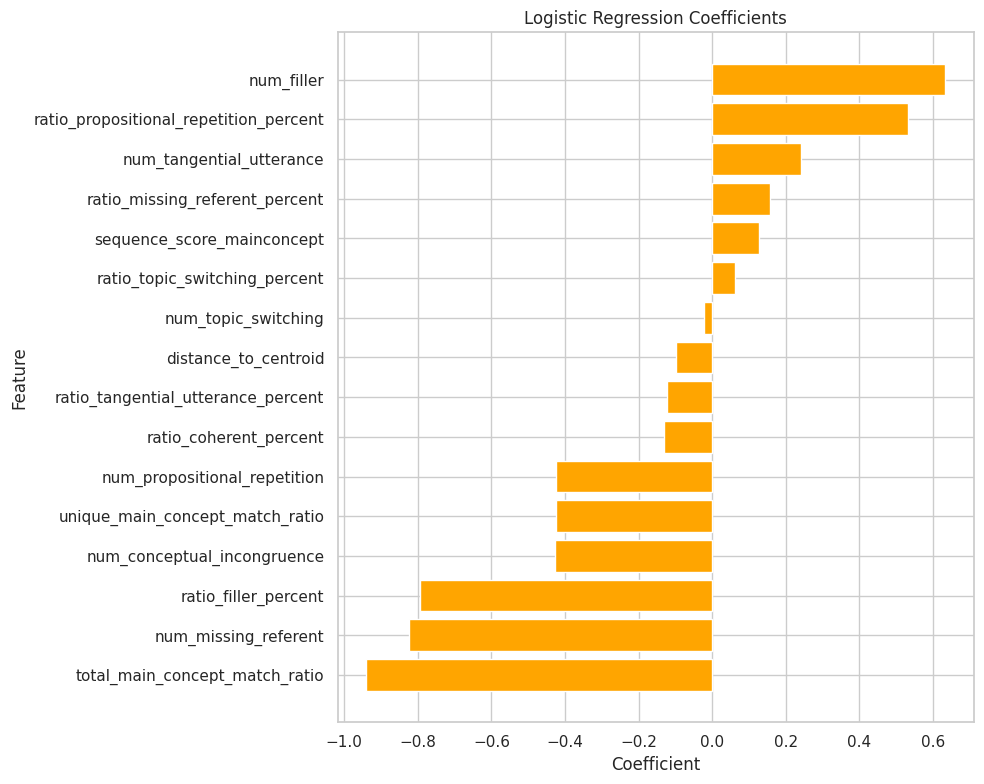

In [62]:
import matplotlib.pyplot as plt

# Sort by coefficient value (descending)
coef_df_sorted = coef_df.sort_values("coefficient", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(coef_df_sorted["feature"], coef_df_sorted["coefficient"], color="orange")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficients")

# Put the highest coefficient at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [63]:
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_sorted = coef_df.sort_values('abs_coef', ascending=False)
coef_sorted

,feature,coefficient,abs_coef
2,total_main_concept_match_ratio,-0.939756,0.939756
6,num_missing_referent,-0.822742,0.822742
13,ratio_filler_percent,-0.794162,0.794162
12,num_filler,0.632590,0.632590
11,ratio_propositional_repetition_percent,0.532757,0.532757
14,num_conceptual_incongruence,-0.426037,0.426037
1,unique_main_concept_match_ratio,-0.425284,0.425284
10,num_propositional_repetition,-0.423663,0.423663
8,num_tangential_utterance,0.241043,0.241043
7,ratio_missing_referent_percent,0.157187,0.157187


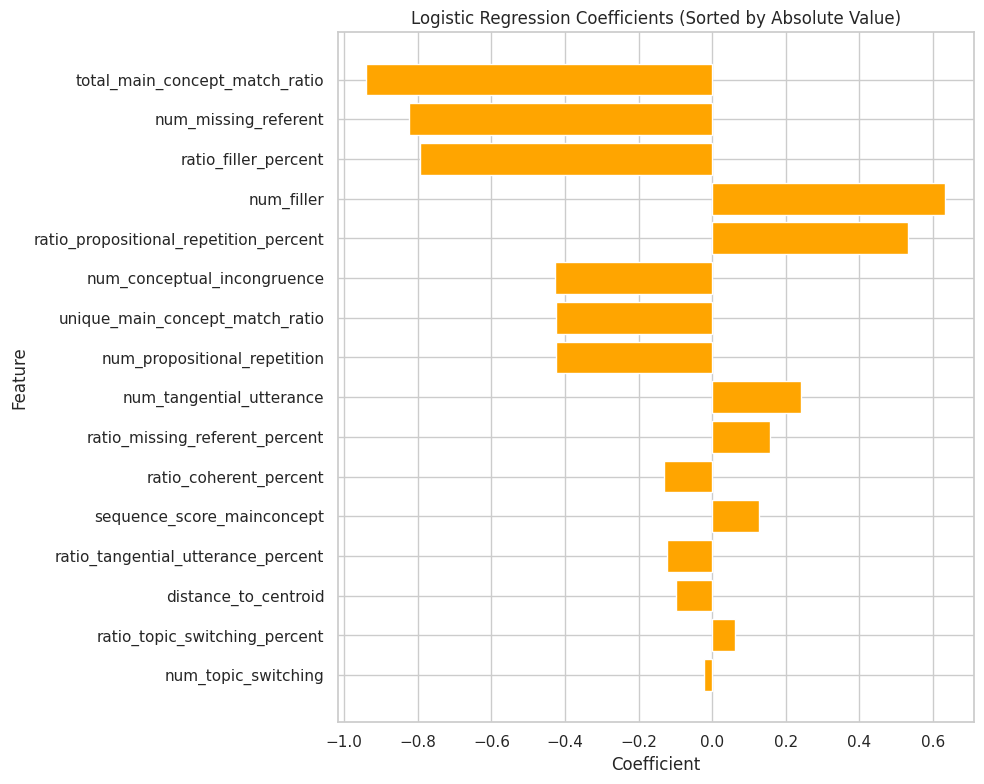

In [64]:

coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df_sorted = coef_df.sort_values("abs_coef", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(coef_df_sorted["feature"], coef_df_sorted["coefficient"], color="orange")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficients (Sorted by Absolute Value)")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Cross Validation 5 Folds

In [65]:
y = df_ml['label']

X = df_ml.drop(
    columns=[
        'label',
        'participant',      # or 'combined_id' depending on what you kept
    ],
    errors='ignore'
)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(
    solver='liblinear',
    max_iter=500,
    class_weight='balanced'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []   # store FN/FP lists here

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    ids_test = participants[test_idx]  # participant IDs for lookup

    # Train
    logreg.fit(X_train_fold, y_train_fold)

    # Predictions
    y_pred = logreg.predict(X_test_fold)

    # False negative = true=1 patient, predicted=0
    fn_mask = (y_test_fold.values == 1) & (y_pred == 0)
    false_negatives = ids_test[fn_mask]

    # False positive = true=0 control, predicted=1
    fp_mask = (y_test_fold.values == 0) & (y_pred == 1)
    false_positives = ids_test[fp_mask]

    fold_results.append({
        "fold": fold,
        "false_negatives": false_negatives.tolist(),
        "false_positives": false_positives.tolist()
    })


In [66]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

print("\n=== Cross-Validation Misclassification Results ===")
pp.pprint(fold_results)


=== Cross-Validation Misclassification Results ===
[   {   'false_negatives': [   'delaware11-1',
                               'delaware216-1',
                               'delaware27-1',
                               'delaware33-1',
                               'delaware49-1',
                               'delaware57-1',
                               'delaware61-1',
                               'delaware74-1',
                               'delaware78-1',
                               'delaware79-1',
                               'jre5043a'],
        'false_positives': [   'delaware05-1',
                               'delaware270-1',
                               'delaware86-1',
                               'capilouto09a'],
        'fold': 1},
    {   'false_negatives': [   'delaware06-1',
                               'delaware32-1',
                               'delaware43-1',
                               'delaware59-1',
                               'del

## Diagnosis of False postives and False Negatives 

In [75]:
misclassified_df = pd.DataFrame(fold_results)

for result in fold_results:
    fold = result["fold"]
    fns = result["false_negatives"]
    fps = result["false_positives"]

    print(f"\n===== Fold {fold} =====")

    # ---- False Negatives (Patient predicted as Control) ----
    print("\nFalse Negatives (Patient wrongly labeled Control):")
    if len(fns) > 0:
        display(participants_df[participants_df['participant'].isin(fns)])
    else:
        print("None")

    # ---- False Positives (Control predicted as Patient) ----
    print("\nFalse Positives (Control wrongly labeled Patient):")
    if len(fps) > 0:
        display(participants_df[participants_df['participant'].isin(fps)])
    else:
        print("None")


===== Fold 1 =====

False Negatives (Patient wrongly labeled Control):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id



False Positives (Control wrongly labeled Patient):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id
97,Capilouto,capilouto09a,82,M,Control,NaN,NaN,Control,capilouto09a



===== Fold 2 =====

False Negatives (Patient wrongly labeled Control):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id



False Positives (Control wrongly labeled Patient):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id
93,Capilouto,capilouto04a,80,F,Control,NaN,NaN,Control,capilouto04a
101,Capilouto,capilouto13a,71,F,Control,NaN,NaN,Control,capilouto13a



===== Fold 3 =====

False Negatives (Patient wrongly labeled Control):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id



False Positives (Control wrongly labeled Patient):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id
91,Capilouto,capilouto02a,85,M,Control,NaN,NaN,Control,capilouto02a
107,Wright,wright06a,65,F,Control,NaN,NaN,Control,wright06a



===== Fold 4 =====

False Negatives (Patient wrongly labeled Control):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id



False Positives (Control wrongly labeled Patient):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id
96,Capilouto,capilouto08a,74,M,Control,NaN,NaN,Control,capilouto08a
105,Wright,wright04a,74,F,Control,NaN,NaN,Control,wright04a



===== Fold 5 =====

False Negatives (Patient wrongly labeled Control):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id



False Positives (Control wrongly labeled Patient):


,Corpus,participant,age,sex,diagnosis,WAB score,standardized MOCA,gen_diagnosis,combined_id
104,Wright,wright03a,76,F,Control,NaN,NaN,Control,wright03a
108,Wright,wright07a,51,F,Control,NaN,NaN,Control,wright07a
110,Wright,wright09a,45,M,Control,NaN,NaN,Control,wright09a


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, accuracy_score, roc_auc_score, roc_curve
)

# Logistic Regression Classifier
logreg = LogisticRegression(
    solver='liblinear',
    max_iter=500,
    class_weight='balanced'
)

# 5-Fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
roc_aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

print("\n===== CONFUSION MATRICES (5 folds) =====\n")

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Train & Predict
    logreg.fit(X_train_fold, y_train_fold)
    y_pred_fold = logreg.predict(X_test_fold)
    y_prob_fold = logreg.predict_proba(X_test_fold)[:, 1]  # probability for ROC

    # Confusion matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    print(f"Fold {fold}:\n{cm}\n")

    # Metrics
    acc = accuracy_score(y_test_fold, y_pred_fold)
    auc = roc_auc_score(y_test_fold, y_prob_fold)
    accuracies.append(acc)
    roc_aucs.append(auc)

    # ROC curve aggregation
    fpr, tpr, _ = roc_curve(y_test_fold, y_prob_fold)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0

# Average ROC curve
mean_tpr /= cv.n_splits
mean_tpr[-1] = 1.0
mean_auc = np.mean(roc_aucs)

# ======= Print Final Metrics =======
print("===== FINAL METRICS =====")
print(f"Accuracy per fold: {np.round(accuracies,3)}")
print(f"Mean Accuracy: {np.mean(accuracies):.3f}")
print(f"AUC per fold: {np.round(roc_aucs,3)}")
print(f"Mean AUC: {mean_auc:.3f}")



===== CONFUSION MATRICES (5 folds) =====

Fold 1:
[[19  4]
 [11  8]]

Fold 2:
[[19  4]
 [ 8 11]]

Fold 3:
[[12 11]
 [ 6 13]]

Fold 4:
[[14  8]
 [ 6 13]]

Fold 5:
[[15  7]
 [ 4 15]]

===== FINAL METRICS =====
Accuracy per fold: [0.643 0.714 0.595 0.659 0.732]
Mean Accuracy: 0.669
AUC per fold: [0.659 0.796 0.748 0.746 0.758]
Mean AUC: 0.742


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

logreg = LogisticRegression(
    solver='liblinear',
    max_iter=500,
    class_weight='balanced'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_list = []

for train_idx, test_idx in cv.split(X, y):
    X_train_fold = X.iloc[train_idx]
    y_train_fold = y.iloc[train_idx]
    
    logreg.fit(X_train_fold, y_train_fold)
    
    # store coef (flatten to 1D)
    coef_list.append(logreg.coef_.flatten())

# Convert to DataFrame: rows = folds, columns = features
remove_cols = ['participant', 'gen_diagnosis']
feature_cols = [c for c in feature_cols if c not in remove_cols]
coef_df_all = pd.DataFrame(coef_list, columns=feature_cols)
coef_df_all



,distance_to_centroid,unique_main_concept_match_ratio,total_main_concept_match_ratio,sequence_score_mainconcept,num_topic_switching,ratio_topic_switching_percent,num_missing_referent,ratio_missing_referent_percent,num_tangential_utterance,ratio_tangential_utterance_percent,num_propositional_repetition,ratio_propositional_repetition_percent,num_filler,ratio_filler_percent,num_conceptual_incongruence,ratio_coherent_percent
0,0.030173,-0.863802,-0.908132,0.369986,-0.047399,0.184823,-0.708550,0.189333,0.323688,0.098343,-0.491307,0.273888,0.332066,-0.650949,-0.244421,-0.029277
1,-0.090834,-0.452929,-0.774880,0.078476,-0.020477,0.037879,-0.662099,0.053531,-0.000113,0.039120,-0.587311,0.533402,0.737930,-0.727754,-0.681841,-0.305110
2,-0.231787,-0.391309,-0.857331,0.080553,-0.097835,0.058047,-1.050032,0.042103,0.216663,-0.191644,-0.262162,0.206577,0.871946,-1.197758,-0.371573,-0.411083
3,-0.300851,-0.293134,-0.664150,-0.029757,-0.017026,0.205570,-0.987763,0.188569,-0.070696,0.248288,-0.339365,0.367294,0.691667,-0.535637,-0.147811,-0.258097
4,-0.104811,-0.276424,-0.852167,0.253298,-0.011960,0.166913,-0.997955,0.360848,0.274612,-0.280197,-0.277727,0.554425,0.544483,-0.472398,-0.479066,0.011785


In [70]:
K = 16  # choose top K features to vote

votes = pd.Series(0, index=feature_cols)

for i in range(len(coef_df_all)):
    fold_coefs = coef_df_all.iloc[i].abs()
    top_k = fold_coefs.nlargest(K).index
    votes[top_k] += 1

votes_sorted = votes.sort_values(ascending=False)
print("\n=== Most Voted Features Across Folds ===")
print(votes_sorted)



=== Most Voted Features Across Folds ===
distance_to_centroid                      5
unique_main_concept_match_ratio           5
total_main_concept_match_ratio            5
sequence_score_mainconcept                5
num_topic_switching                       5
ratio_topic_switching_percent             5
num_missing_referent                      5
ratio_missing_referent_percent            5
num_tangential_utterance                  5
ratio_tangential_utterance_percent        5
num_propositional_repetition              5
ratio_propositional_repetition_percent    5
num_filler                                5
ratio_filler_percent                      5
num_conceptual_incongruence               5
ratio_coherent_percent                    5
dtype: int64


In [72]:
# Mean signed coefficients (keep sign)
mean_signed_coef = coef_df_all.mean()

# Mean absolute coefficient (for ordering)
mean_abs_coef = coef_df_all.abs().mean()

# Combine into one DataFrame
importance_signed = pd.DataFrame({
    "mean_coef": mean_signed_coef,
    "mean_abs_coef": mean_abs_coef,
    "votes": votes_sorted  # if you computed votes earlier
})

# Sort by abs value
importance_signed = importance_signed.sort_values("mean_abs_coef", ascending=False)
importance_signed.head()


,mean_coef,mean_abs_coef,votes
num_missing_referent,-0.881280,0.881280,5
total_main_concept_match_ratio,-0.811332,0.811332,5
ratio_filler_percent,-0.716899,0.716899,5
num_filler,0.635618,0.635618,5
unique_main_concept_match_ratio,-0.455519,0.455519,5


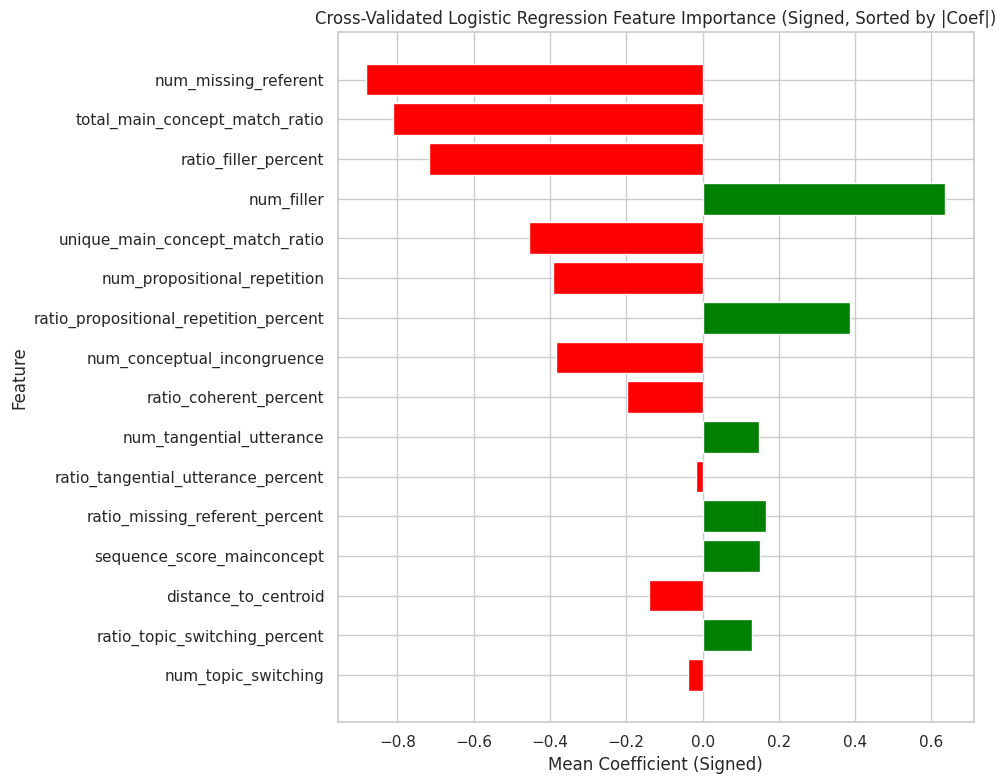

In [73]:
plt.figure(figsize=(10, 8))

plt.barh(
    importance_signed.index,
    importance_signed["mean_coef"],
    color=["green" if x > 0 else "red" for x in importance_signed["mean_coef"]]
)

plt.xlabel("Mean Coefficient (Signed)")
plt.ylabel("Feature")
plt.title("Cross-Validated Logistic Regression Feature Importance (Signed, Sorted by |Coef|)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()